In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pipeline import transformation_pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv('D:/Downloads/final-year-project/data/preprocessed_train_data.csv')

In [3]:
pipeline, data_cleaned = transformation_pipeline(
    data, building_id=122, meter=0, primary_use=99)

d:\Downloads\final-year-project\notebooks\data_fetcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['building_id', 'meter', 'primary_use'],
d:\Downloads\final-year-project\notebooks\data_fetcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])
d:\Downloads\final-year-project\notebooks\data_fetcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [4]:
transformed_data = pipeline.fit_transform(data_cleaned)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(transformed_data[:, 1:],
                                                  transformed_data[:, 0],
                                                  test_size=0.2,
                                                  shuffle=False,
                                                  random_state=2021)

In [6]:
x_val.shape

(1753, 12)

In [7]:
train_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train,
                                                                y_train,
                                                                length=6, sampling_rate=1,
                                                                stride=1, batch_size=32
                                                                )

val_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_val,
                                                              y_val,
                                                              length=6, sampling_rate=1,
                                                              stride=1, batch_size=32
                                                              )

In [17]:
model = tf.keras.Sequential([tf.keras.layers.SimpleRNN( 128, activation='relu',
                                                  return_sequences=False),
                            tf.keras.layers.Dense(1)])



In [30]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001))

cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=15,
                                      restore_best_weights=True)
# Fitting the model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[cb],
                    shuffle=False)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0187 - val_loss: 0.0118
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0120
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0125
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0125
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0122
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0120
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0118
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0116
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0113
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0134 - val_lo

### Model Performance (Before Tuning)

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Helper function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Helper function to calculate SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Assuming you have the generators `train_gen` and `val_gen`
y_true_val = np.concatenate([y for x, y in val_gen], axis=0)
y_pred_val = model.predict(val_gen).flatten()

mse = mean_squared_error(y_true_val, y_pred_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_val, y_pred_val)
mape = mean_absolute_percentage_error(y_true_val, y_pred_val)
smape = symmetric_mean_absolute_percentage_error(y_true_val, y_pred_val)
forecast_bias = np.mean(y_pred_val - y_true_val)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'SMAPE: {smape}')
print(f'Forecast Bias: {forecast_bias}')


55/55 [==============================] - 0s 865us/step
MSE: 0.009190303432517713
RMSE: 0.09586607028828141
MAE: 0.07372760675927932
MAPE: 21.129208948558247
SMAPE: 21.660926088367287
Forecast Bias: -0.0034295925521652306


In [20]:
best_val_loss = float('inf')
best_params = {}

for units in [128, 256, 512]:
    for learning_rate in [0.001, 0.01]:
        val_losses = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            model, history = build_and_train_model(X_train, y_train, X_val, y_val, units=units, learning_rate=learning_rate)
            y_pred_val = model.predict(X_val).flatten()
            
            val_loss = mean_squared_error(y_val, y_pred_val)
            val_losses.append(val_loss)
        
        mean_val_loss = np.mean(val_losses)
        print(f'Params: units={units}, lr={learning_rate} - Mean Val MSE: {mean_val_loss}')
        
        if mean_val_loss < best_val_loss:
            best_val_loss = mean_val_loss
            best_params = {'units': units, 'learning_rate': learning_rate}

print(f'Best params: {best_params}')
print(f'Best validation MSE: {best_val_loss}')


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.2628 - val_loss: 0.1312
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1060 - val_loss: 0.1005
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0942 - val_loss: 0.0972
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0909 - val_loss: 0.0954
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0889 - val_loss: 0.0947
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 0.0945
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0864 - val_loss: 0.0943
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0941
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0850 - val_loss: 0.0940
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0844 - val_loss: 0.0939
Epoch 11

In [42]:
import tensorflow as tf

# Model definition
final_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(512, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(1)
])

# Compiling the model with the updated learning rate
final_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.01))

# Callback for early stopping
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Fitting the model
history = final_model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[cb],
                    shuffle=False)


Epoch 1/100
219/219 [==============================] - 3s 9ms/step - loss: 156.4768 - val_loss: 0.0324
Epoch 2/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0265 - val_loss: 0.0130
Epoch 3/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0191 - val_loss: 0.0448
Epoch 4/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0253 - val_loss: 0.1076
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0166 - val_loss: 0.0106
Epoch 6/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0166 - val_loss: 0.0117
Epoch 7/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0183 - val_loss: 0.0117
Epoch 8/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0148 - val_loss: 0.0093
Epoch 9/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0146 - val_loss: 0.0117
Epoch 10/100
219/219 [==============================] - 2s 9ms/step - loss: 0.0139 - val_

In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Helper function to calculate SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Assuming you have the generators `train_gen` and `val_gen`
y_true_val = np.concatenate([y for x, y in val_gen], axis=0)
y_pred_val = final_model.predict(val_gen).flatten()

mse = mean_squared_error(y_true_val, y_pred_val)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_val, y_pred_val)
mape = mean_absolute_percentage_error(y_true_val, y_pred_val)
smape = symmetric_mean_absolute_percentage_error(y_true_val, y_pred_val)
forecast_bias = np.mean(y_pred_val - y_true_val)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'SMAPE: {smape}')
print(f'Forecast Bias: {forecast_bias}')


55/55 [==============================] - 0s 2ms/step
MSE: 0.0053021118418614625
RMSE: 0.07281560163770853
MAE: 0.05287403195240118
MAPE: 13.586127690138047
SMAPE: 13.508578635136923
Forecast Bias: -0.010117933436411033


In [15]:
%pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [52]:
final_model.save('models/RNN_ADAM')

INFO:tensorflow:Assets written to: models/RNN_ADAM\assets


INFO:tensorflow:Assets written to: models/RNN_ADAM\assets


In [53]:
predicted_batch_7 = final_model.predict(val_gen[7][0])

1/1 [==============================] - 0s 37ms/step


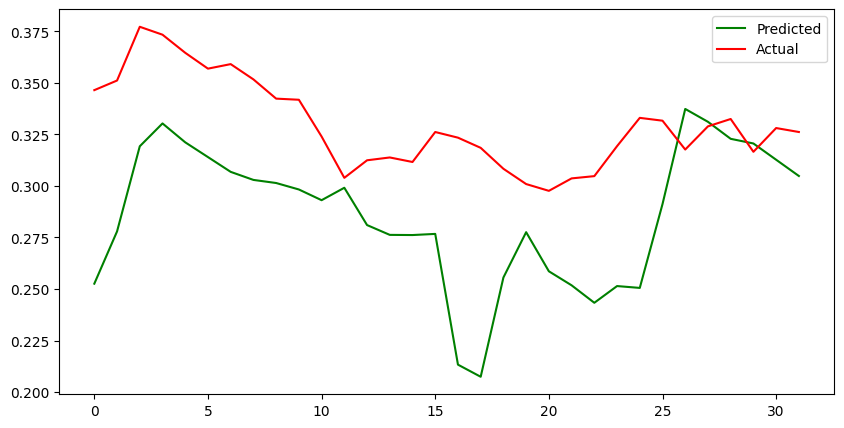

In [54]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(32),
        predicted_batch_7,
        color='green', label='Predicted')

ax.plot(range(32),
        val_gen[7][1],
        color='red', label='Actual')
ax.legend()

plt.show()

In [46]:
predicted = []
actual = []
for i in range(32):
    predicted.extend(final_model.predict(val_gen[i][0]))
    actual.extend(val_gen[i][1])

1/1 [==============================] - 0s 16ms/step


In [47]:
print('Testing Loss= ', np.mean(tf.keras.losses.MSE(actual, predicted)))
# Testing Loss=  0.04267618
# my testing loss = 0.0445793

Testing Loss=  0.024835937


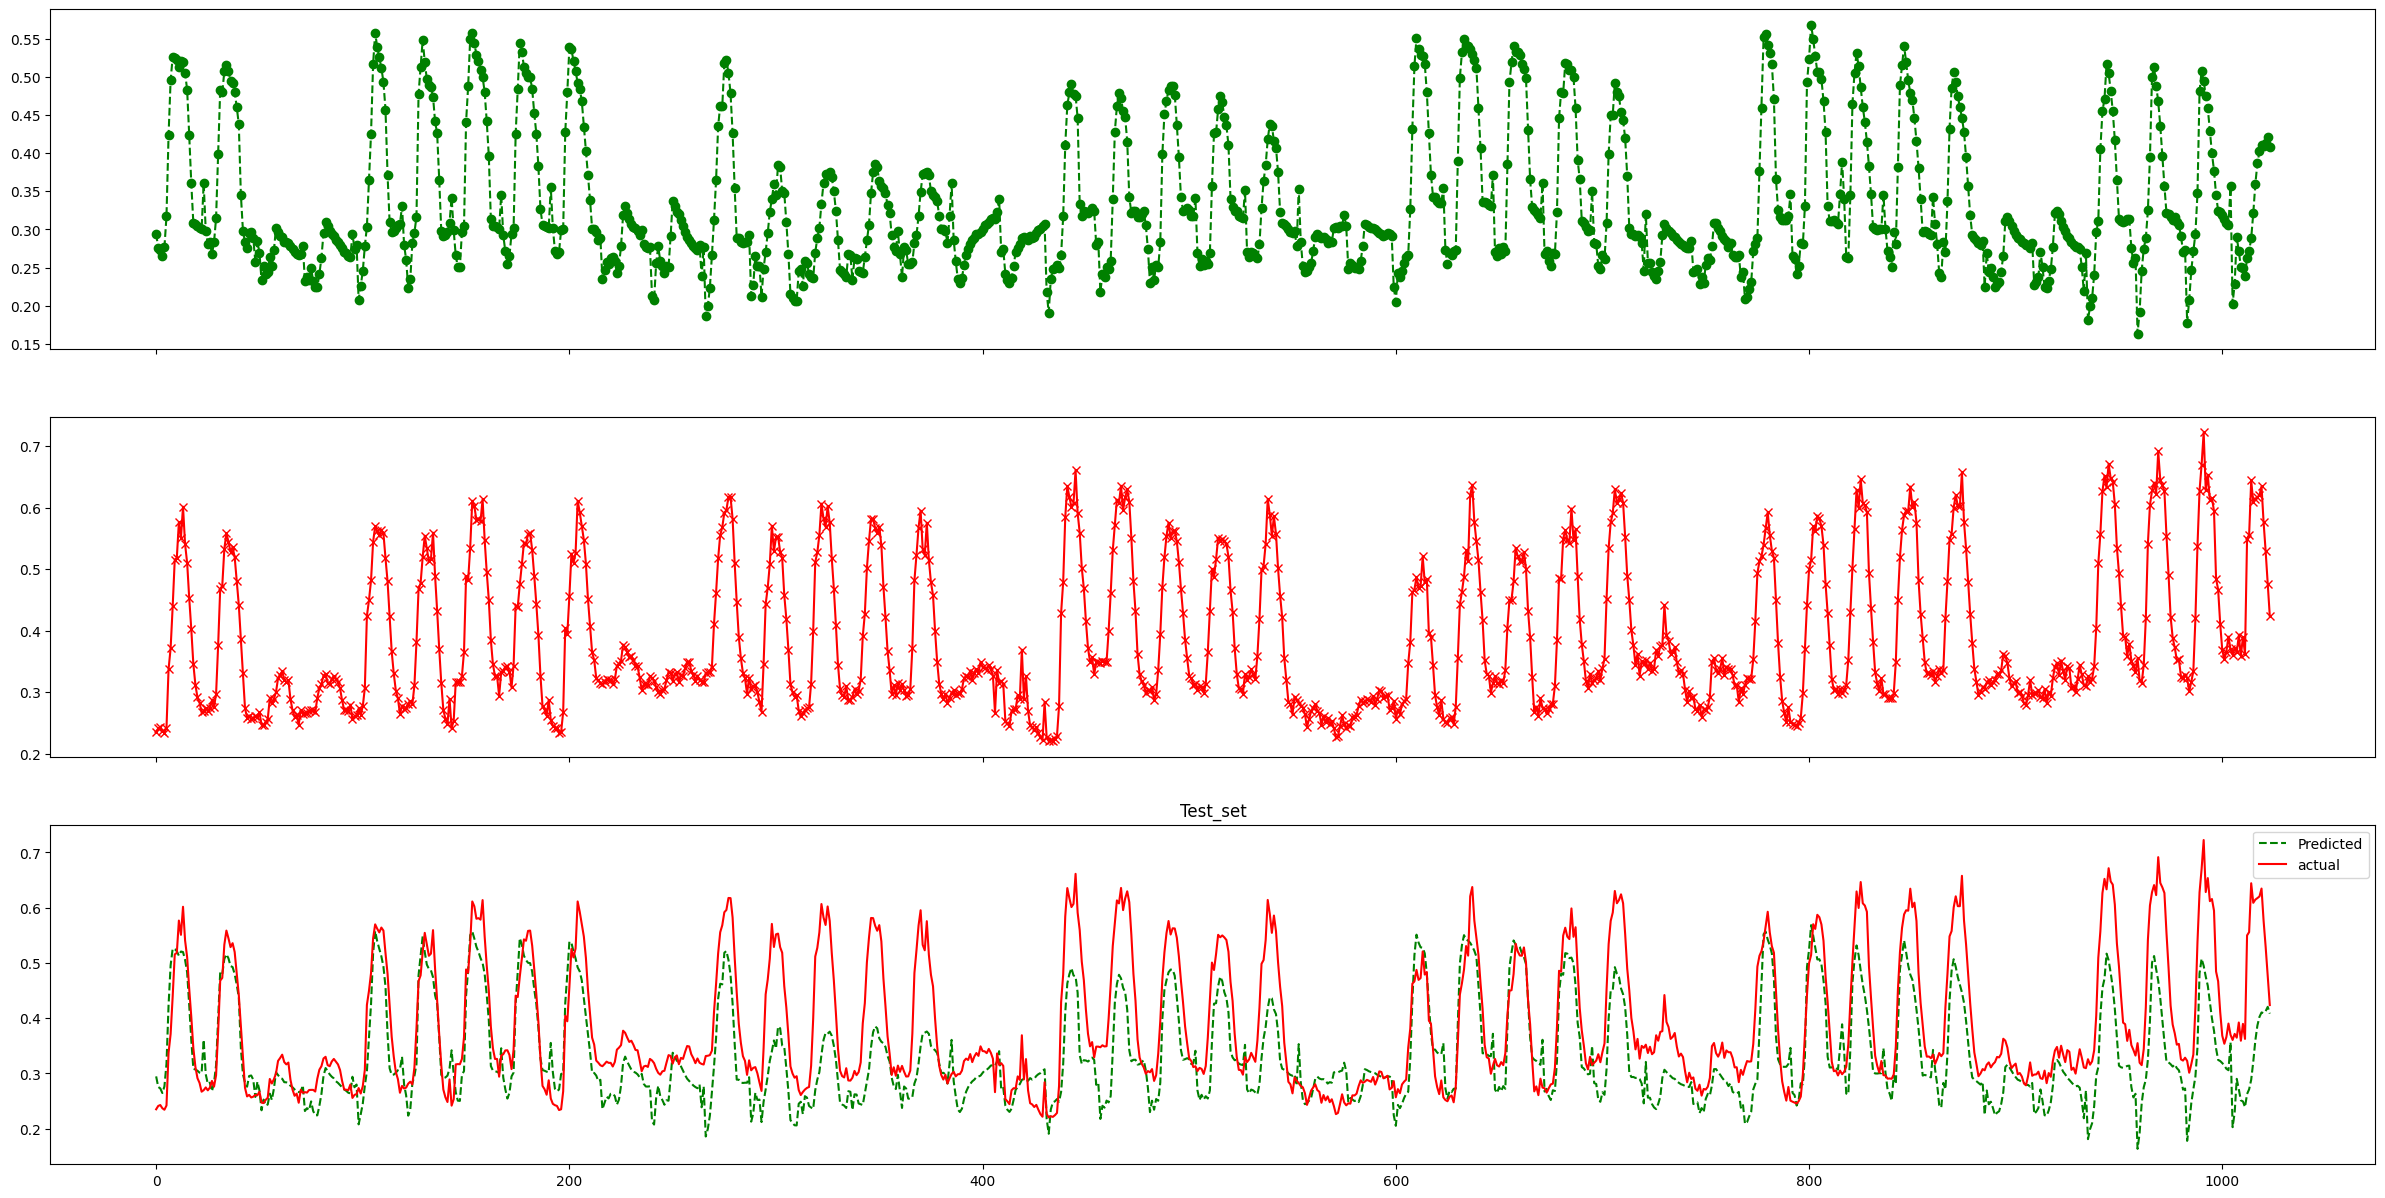

In [48]:
fig, (ax1, ax2, ax) = plt.subplots(3, 1,  figsize=(30, 15), sharex=True)

ax1.plot(range(len(actual)),
         predicted,
         color='green', marker='o', linestyle='dashed', label='Predicted')
plt.legend()

ax2.plot(range(len(actual)),
         actual,
         color='red', marker='x', label='Actual')
plt.legend()

ax.plot(range(len(actual)),
        predicted,
        color='green', linestyle='dashed',
        label='Predicted')
plt.legend()
ax.plot(range(len(actual)),
        actual,
        color='red',
        label='actual')

plt.legend()

plt.title('Test_set', loc='center')

plt.show()

In [50]:
predicted_t = []
actual_t = []
for i in range(32):
    predicted_t.extend(final_model.predict(train_gen[i][0]))
    actual_t.extend(train_gen[i][1])

1/1 [==============================] - 0s 16ms/step


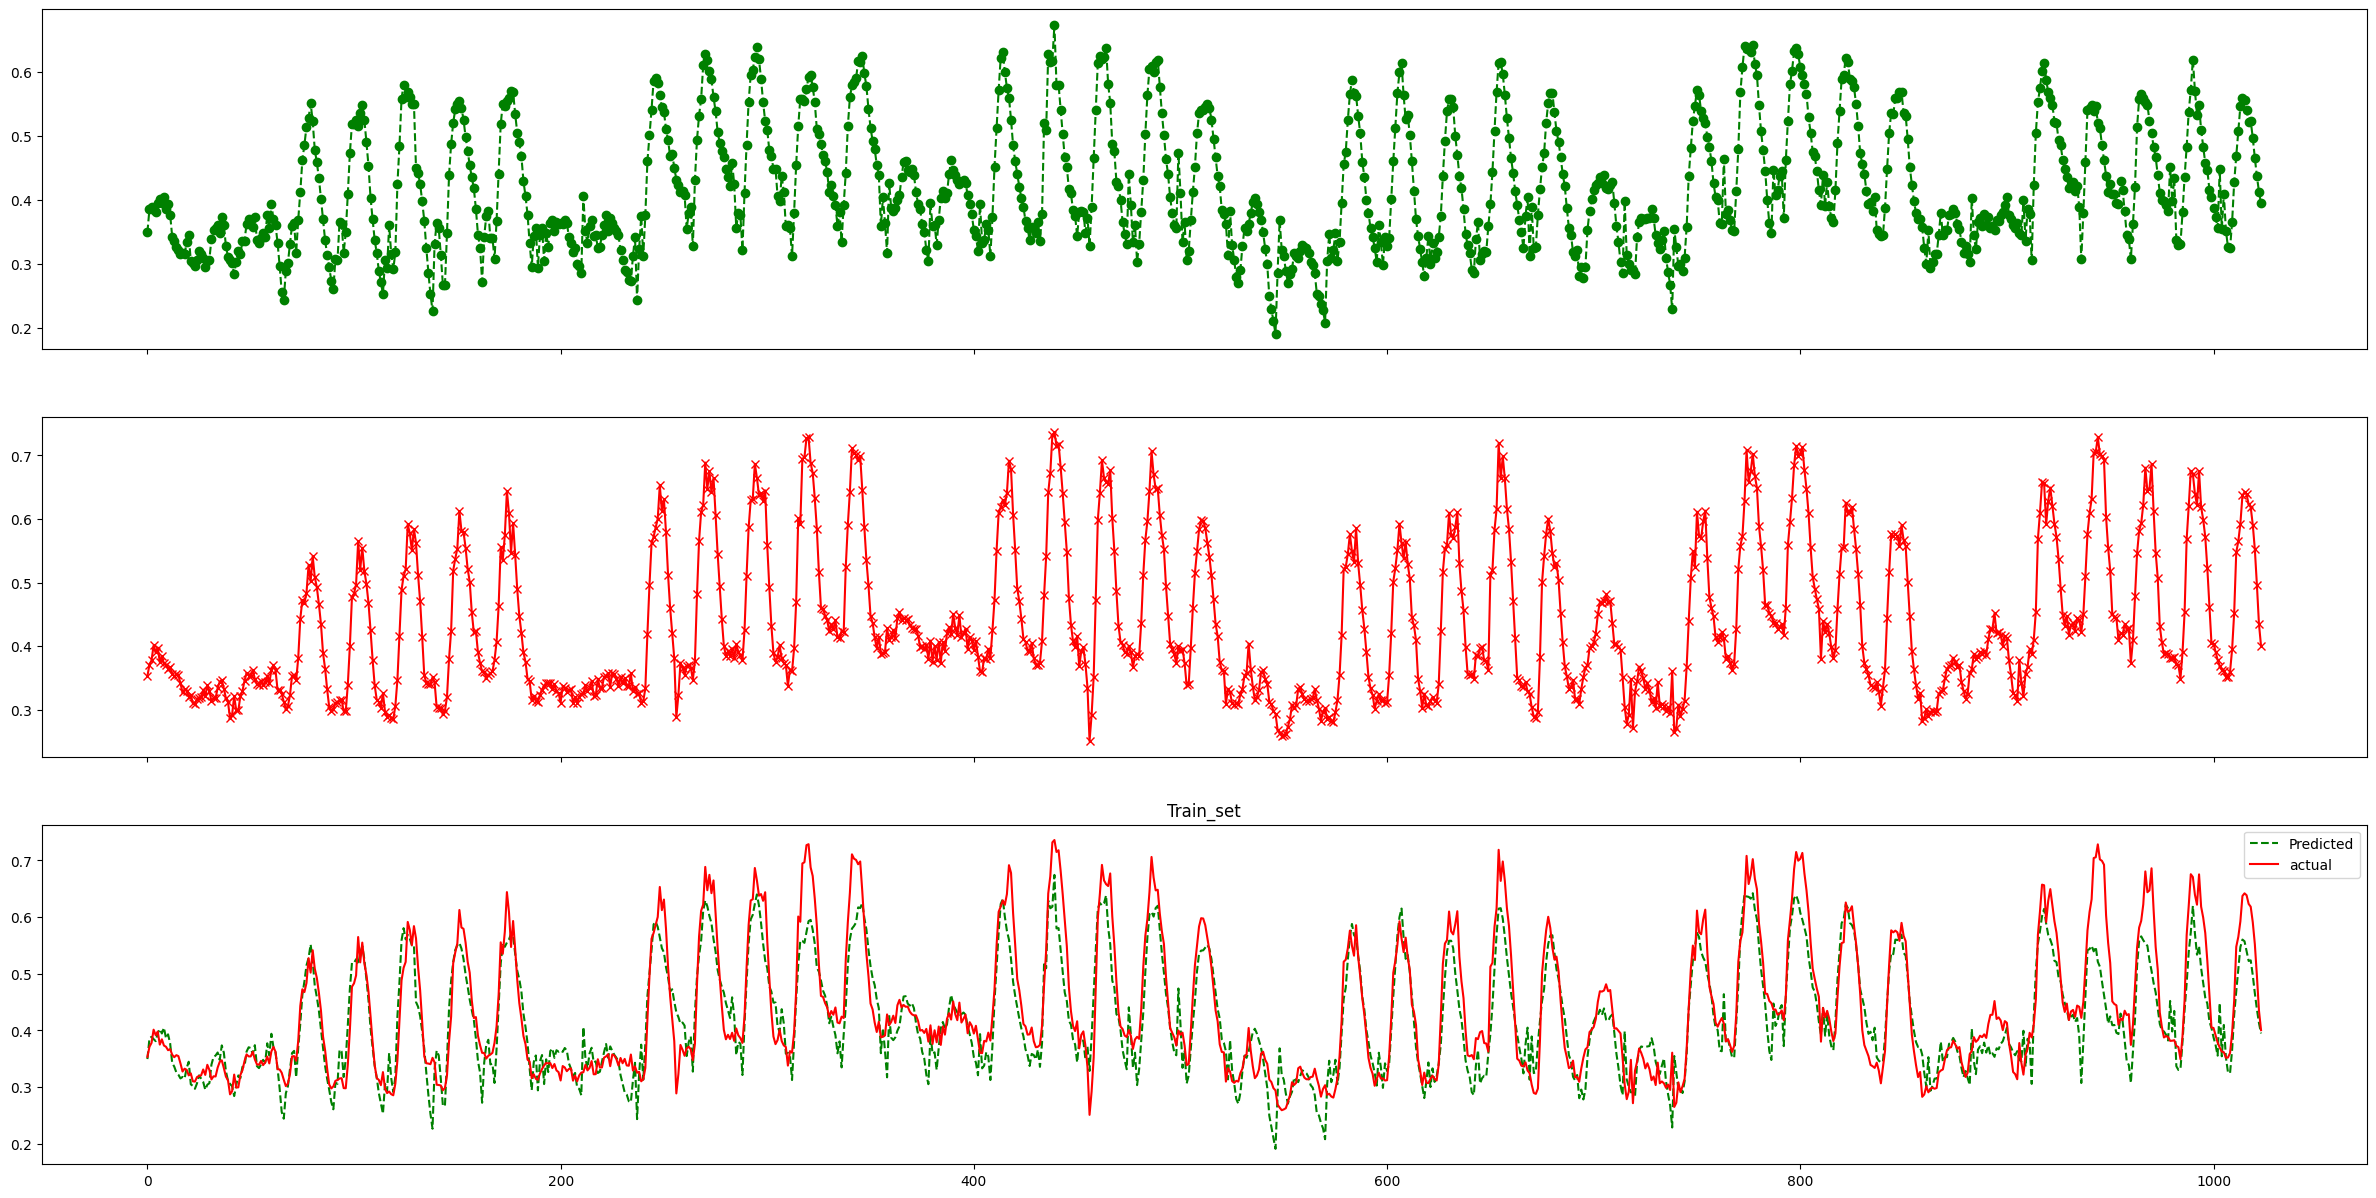

In [39]:
fig, (ax1, ax2, ax) = plt.subplots(3, 1,  figsize=(30, 15), sharex=True)

ax1.plot(range(len(actual_t)),
         predicted_t,
         color='green', marker='o', linestyle='dashed',
         label='Predicted')

ax2.plot(range(len(actual_t)),
         actual_t,
         color='red', marker='x', label='Actual')


ax.plot(range(len(actual_t)),
        predicted_t,
        color='green', linestyle='dashed',
        label='Predicted')

ax.plot(range(len(actual_t)),
        actual_t,
        color='red',
        label='actual')
plt.title('Train_set', loc='center')

plt.legend()

plt.show()

In [51]:
model.summary()
# Total params: 18,433
# Total params:18,177

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               18048     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________
